In [2]:
#!pip install cryptography pymysql sqlalchemy pandas matplotlib seaborn


C:\Users\Administrator\AppData\Local\Temp\ipykernel_34336\42858788.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='customer_state', y='total_orders', palette='viridis')


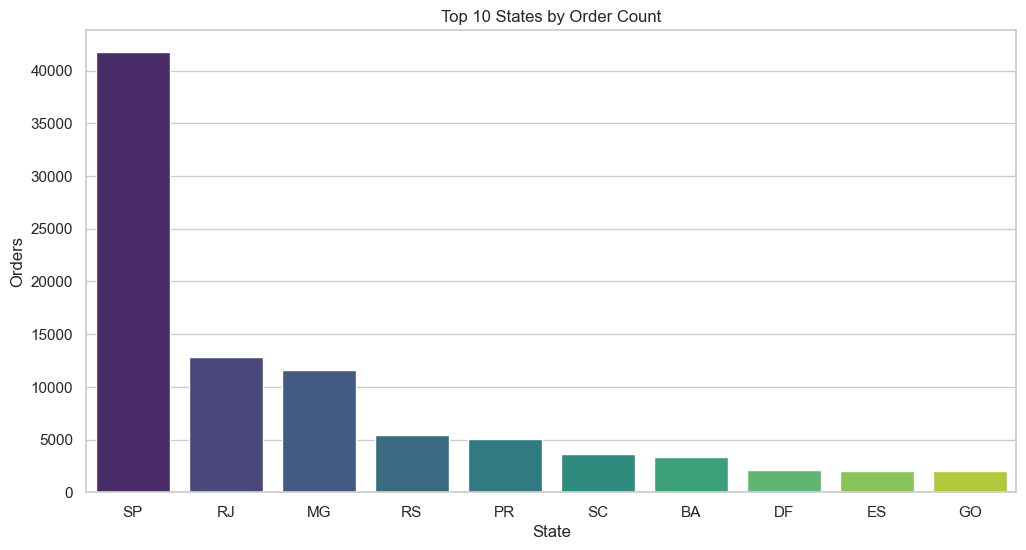

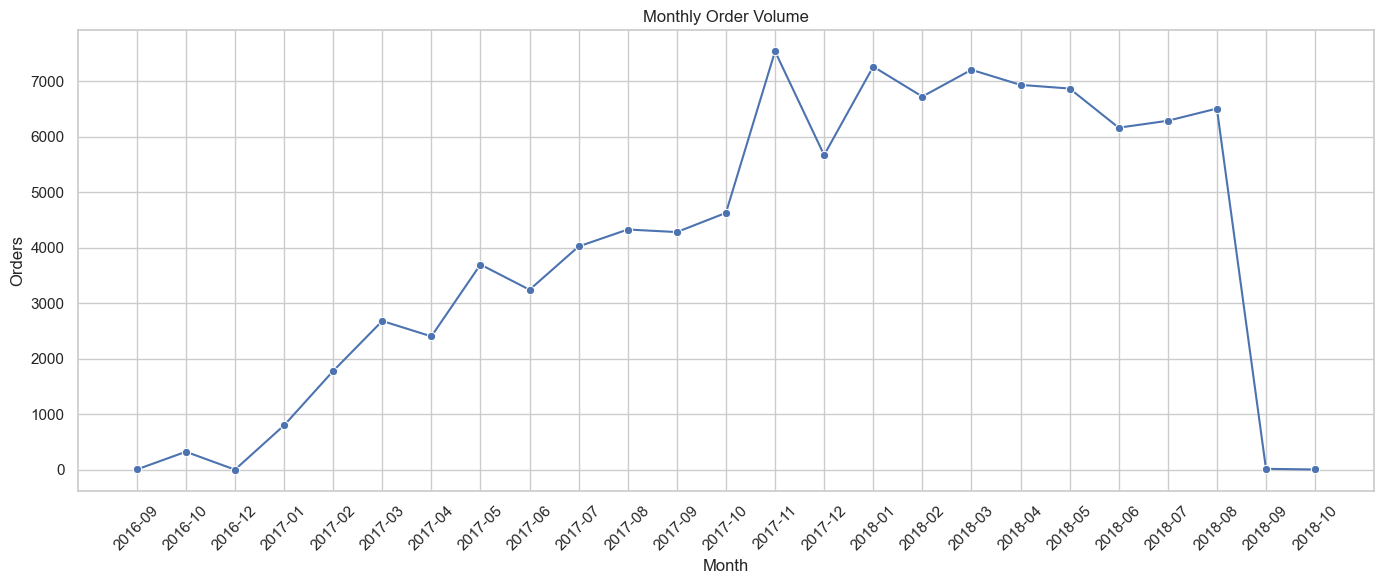

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34336\42858788.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, y='product_category_name_english', x='total_sold', palette='magma')


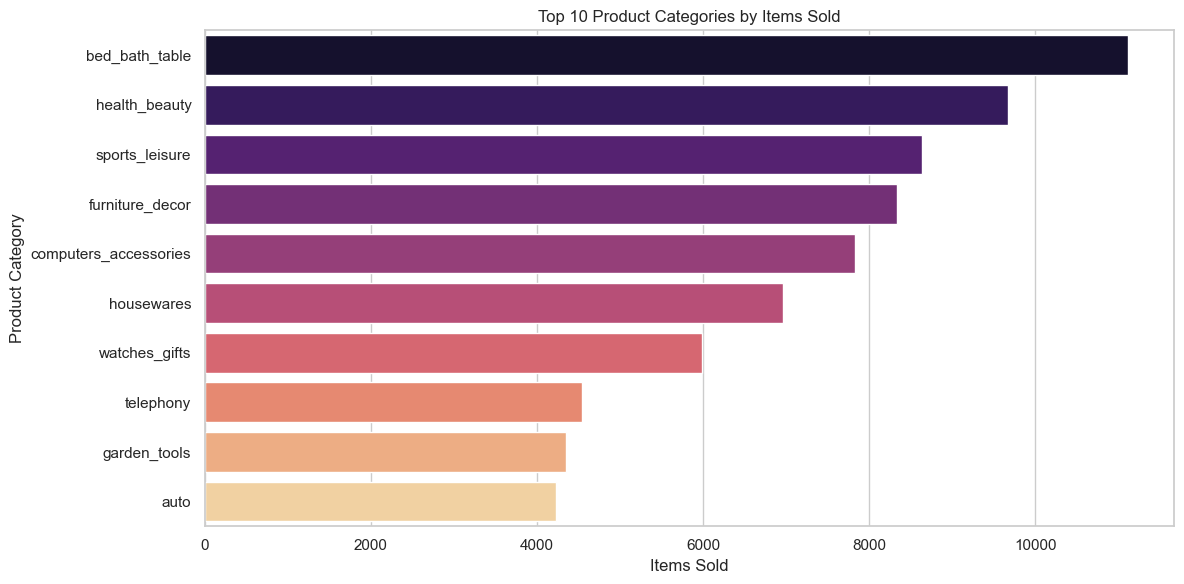

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34336\42858788.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, x='payment_type', y='payment_count', palette='pastel')


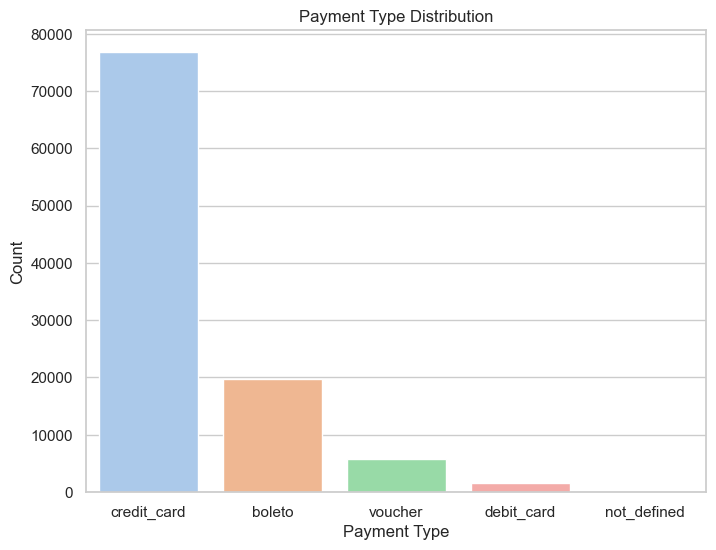

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34336\42858788.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x='review_score', y='total_reviews', palette='coolwarm')


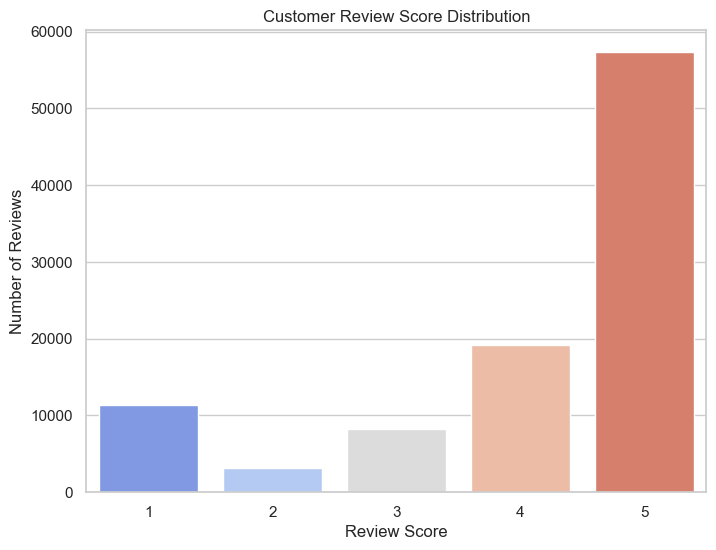

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# MySQL connection details
user = 'root'
password = '#####' 
host = 'localhost'
database = 'olist'  

# Create connection engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

# Set Seaborn style
sns.set(style="whitegrid")

# Orders by State
query1 = """
SELECT c.customer_state, COUNT(DISTINCT o.order_id) AS total_orders
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_state
ORDER BY total_orders DESC
LIMIT 10;
"""
df1 = pd.read_sql(query1, engine)
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='customer_state', y='total_orders', palette='viridis')
plt.title("Top 10 States by Order Count")
plt.xlabel("State")
plt.ylabel("Orders")
plt.show()

# Monthly Order Volume
query2 = """
SELECT DATE_FORMAT(order_purchase_timestamp, '%%Y-%%m') AS order_month, COUNT(*) AS total_orders
FROM orders
GROUP BY order_month
ORDER BY order_month;
"""
df2 = pd.read_sql(query2, engine)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df2, x='order_month', y='total_orders', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()

# Top 10 Product Categories
query3 = """
SELECT pt.product_category_name_english, COUNT(*) AS total_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN product_category_translation pt ON p.product_category_name = pt.product_category_name
GROUP BY pt.product_category_name_english
ORDER BY total_sold DESC
LIMIT 10;
"""
df3 = pd.read_sql(query3, engine)
plt.figure(figsize=(12, 6))
sns.barplot(data=df3, y='product_category_name_english', x='total_sold', palette='magma')
plt.title("Top 10 Product Categories by Items Sold")
plt.xlabel("Items Sold")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

# Payment Type Distribution
query4 = """
SELECT payment_type, COUNT(*) AS payment_count
FROM order_payments
GROUP BY payment_type
ORDER BY payment_count DESC;
"""
df4 = pd.read_sql(query4, engine)
plt.figure(figsize=(8, 6))
sns.barplot(data=df4, x='payment_type', y='payment_count', palette='pastel')
plt.title("Payment Type Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

#  Review Score Distribution
query5 = """
SELECT review_score, COUNT(*) AS total_reviews
FROM order_reviews
GROUP BY review_score
ORDER BY review_score;
"""
df5 = pd.read_sql(query5, engine)
plt.figure(figsize=(8, 6))
sns.barplot(data=df5, x='review_score', y='total_reviews', palette='coolwarm')
plt.title("Customer Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.show()

